# Basic Image Manipulation

## Importing Modules

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Downloading Assets

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "assets/opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

## Checkbox Image

In [4]:
Image(filename='assets/checkerboard_18x18.png')

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

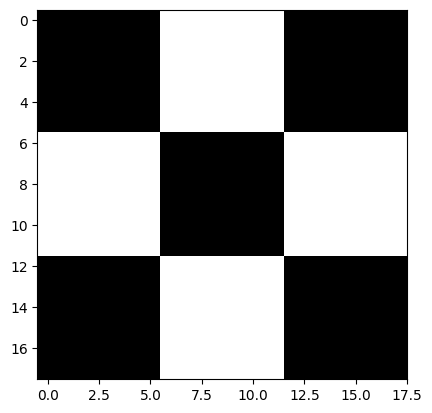

In [5]:
# Read the image as grayscale
cb_img = cv2.imread('assets/checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(cb_img, cmap='gray')
print(cb_img)

## Accessing Individual Pixels

In [6]:
# get the first pixel of the first block
print(cb_img[0, 0])
# get the first pixel of the second block
print(cb_img[0, 6])

0
255


## Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

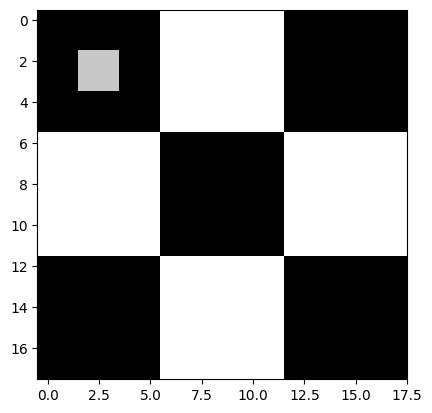

In [7]:
cb_img_copy = cb_img.copy()
cb_img_copy[2:4, 2:4] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

## Cropping Images

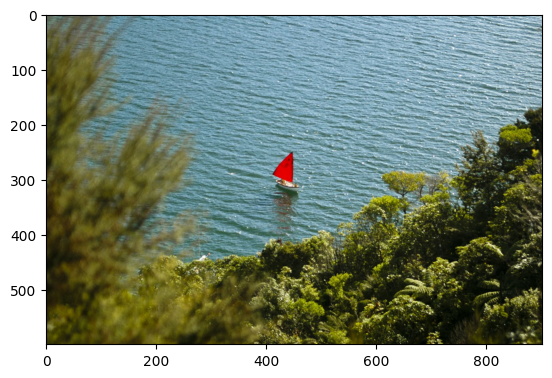

In [8]:
img_NZ_bgr = cv2.imread('assets/New_Zealand_Boat.jpg', cv2.IMREAD_COLOR)
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
# img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

### <font color="green">Crop out the middle region of the image</font>

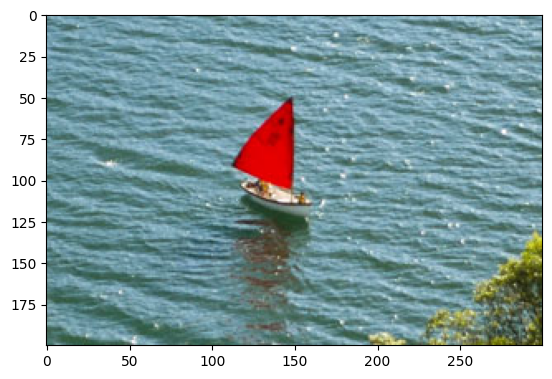

In [9]:
cropped_img = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_img)

## Resizing Images

Function **resize** is used to resize the image. It takes two arguments: the image and the new size. The new size is a tuple in the format (width, height).

Syntax: `resize(image, (width, height))`

### <font color="green">Specifying scaling factor using fx and fy</font>

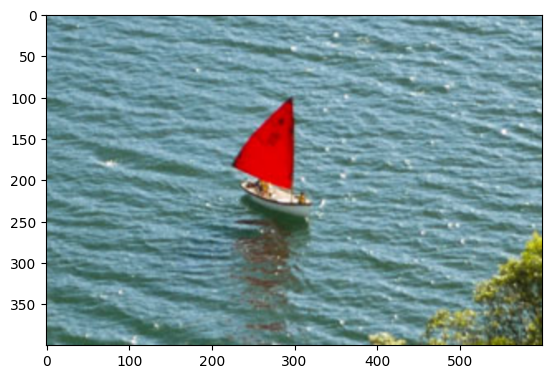

In [10]:
resized_cropped_img_2x = cv2.resize(cropped_img, dsize=None, fx=2, fy=2)
plt.imshow(resized_cropped_img_2x)

### <font color="green">Specify exact size of the output image</font>

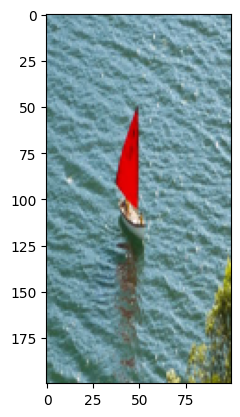

In [11]:
desired_size = (100, 200)

resized_cropped_img = cv2.resize(cropped_img, dsize=desired_size, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_img)

### <font color="green">Resize while maintaining aspect ratio</font>

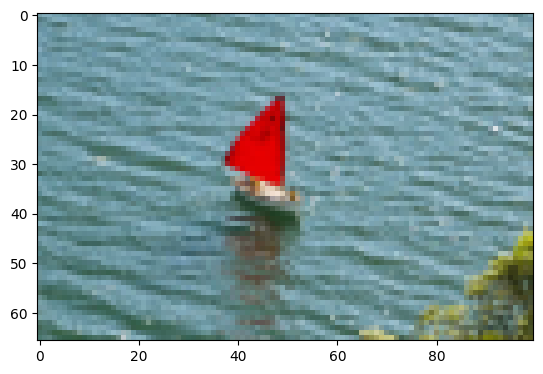

In [12]:
desired_width = 100
aspect_ratio = desired_width / cropped_img.shape[1]
desired_height = int(cropped_img.shape[0] * aspect_ratio)

resized_cropped_img_aspect = cv2.resize(cropped_img, dsize=(desired_width, desired_height), interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_img_aspect)

## Show the (cropped) image

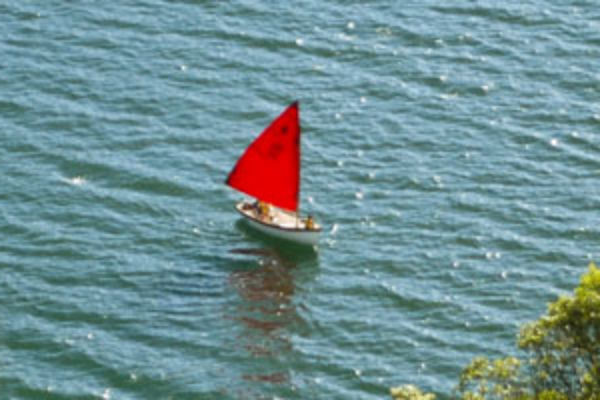

In [13]:
resized_cropped_img_2x = resized_cropped_img_2x[:, :, ::-1]

cv2.imwrite('assets/New_Zealand_Boat_cropped_resized_2x.png', resized_cropped_img_2x)

Image(filename='assets/New_Zealand_Boat_cropped_resized_2x.png')

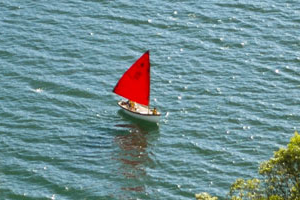

In [14]:
cropped_img = cropped_img[:, :, ::-1]

cv2.imwrite('assets/New_Zealand_Boat_cropped.png', cropped_img)

Image(filename='assets/New_Zealand_Boat_cropped.png')

## Flip Image

Function **flip** is used to flip the image. It takes two arguments: the image and the flip code. The flip code can be 0, 1, or -1.

Syntax: `flip(image, flipCode)`

Text(0.5, 1.0, 'Flipped Both')

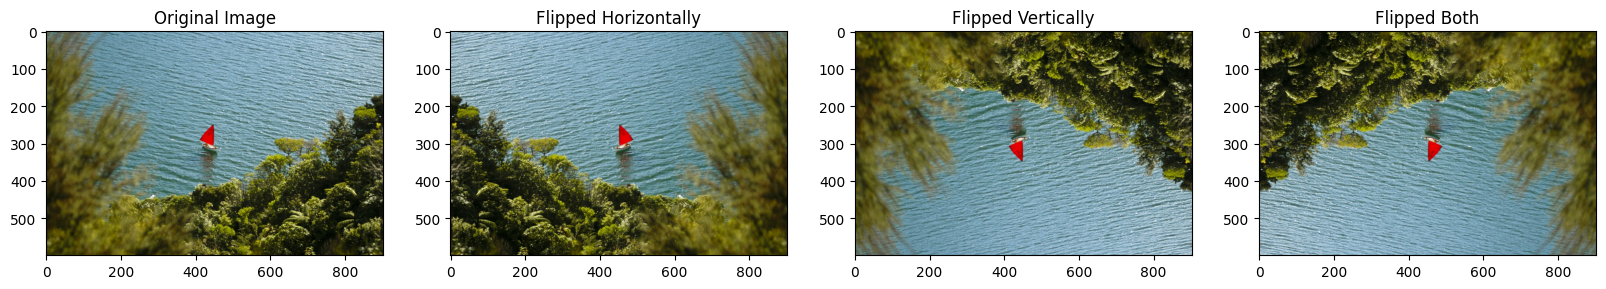

In [15]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, flipCode=1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, flipCode=0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, flipCode=-1)

plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb);plt.title('Original Image')
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_horz);plt.title('Flipped Horizontally')
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_vert);plt.title('Flipped Vertically')
plt.subplot(144);plt.imshow(img_NZ_rgb_flipped_both);plt.title('Flipped Both')